## Tweet Analysis of Indian Political Parties

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Imports:

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import tqdm

#### Twitter Account Analysis of Aam Aadmi Party

In [3]:
# load the data
df1 = pd.read_csv("/content/drive/MyDrive/Data/AamAadmiParty.csv")

In [4]:
# print the first 5 rows of data
df1.head()

,Datetime,Tweet Id,Text,Username,likeCount
0,2023-06-06 16:41:21+00:00,1666123118501580800,सत्ता के नशे में अंधी BJP सरकार Haryana की बेट...,AamAadmiParty,1815.0
1,2023-06-06 12:52:44+00:00,1666065586546434049,Congress मुफ़्त बिजली की #KejriwalKiGuarantee ...,AamAadmiParty,1103.0
2,2023-06-06 12:35:19+00:00,1666061203481718786,Modi सरकार के Ordinance के खिलाफ महारैली को मि...,AamAadmiParty,1232.0
3,2023-06-06 11:59:13+00:00,1666052117088587777,केजरीवाल जी की Guarantee “Copy” करके चुनाव तो ...,AamAadmiParty,659.0
4,2023-06-06 11:40:40+00:00,1666047449247678469,CM @ArvindKejriwal जी की प्राथमिकता में शिक्षा...,AamAadmiParty,542.0


In [5]:
# print the last 5 rows of data
df1.tail()

,Datetime,Tweet Id,Text,Username,likeCount
66180,2012-07-25 06:34:57+00:00,228015464041824257,"Anna, Arvind Kejriwal, Manish Sisodia, Gopal R...",AamAadmiParty,0.0
66181,2012-07-25 06:29:29+00:00,228014086053568512,"Thousands at Jantar Mantar. Anna, Arvind Kejri...",AamAadmiParty,0.0
66182,2012-07-23 08:35:02+00:00,227320908656832515,@AKParivartan @ArvindKejriwal7 in Aap ki Adala...,AamAadmiParty,0.0
66183,2012-07-23 06:18:38+00:00,227286579700457472,On #22July a massive Car and Bike rally took p...,AamAadmiParty,0.0
66184,2012-07-23 03:28:06+00:00,227243664022310912,"For regular #IAC updates about July 25 Anshan,...",AamAadmiParty,6.0


In [6]:
# print the dimensions of the dataframe
df1.shape

(66185, 5)

In [7]:
# mean of the likeCount
df1['likeCount'].mean()

418.87258605578893

In [8]:
# first date of the tweet and last date of the tweet
print("Latest tweet date: ", df1['Datetime'].max())
print("Oldest tweet date: ", df1['Datetime'].min())

Latest tweet date:  than through “Whatsapp University”. - Hon'ble Dy CM Shri @msisodia
Oldest tweet date:  #FraudBySecretBallot


In [9]:
# print columns
df1.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'likeCount'], dtype='object')

Segregate the tweets based on their language

In [10]:
# install langdetect
!pip3 install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=b9c34d97542660b94ab8535364eedf120a0aa9475f7eb46da40f03ed01c3d9a3
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [11]:
from langdetect import detect

# Create separate dataframes for English and Hindi tweets
english_tweets = []
hindi_tweets = []

# Iterate over each tweet
for index, row in df1.iterrows():
    tweet_text = row['Text']
    try:
        lang = detect(tweet_text)
        if lang == 'en':
            english_tweets.append(row)
        elif lang == 'hi':
            hindi_tweets.append(row)
    except:
        # Handle any errors during language detection
        pass

# Convert the English and Hindi tweets lists to dataframes
english_tweets_df = pd.DataFrame(english_tweets)
hindi_tweets_df = pd.DataFrame(hindi_tweets)

Cleaning the text. Removing any symbols and unnecessary characters from the text for making it useful for further processing.

In [12]:
def clean_text(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    clean_text = re.sub(r'\s+', ' ', clean_text)
    return clean_text

In [13]:
english_tweets_df['Text'] = english_tweets_df['Text'].apply(clean_text)

In [14]:
english_tweets_df.shape

(36103, 5)

In [15]:
english_tweets_df.head()

,Datetime,Tweet Id,Text,Username,likeCount
5,2023-06-06 11:40:30+00:00,1666047407908585472,GGSIPU Campus East Delhi 388 Cr 19 Acre Area 2...,AamAadmiParty,1051.0
6,2023-06-06 11:40:29+00:00,1666047404280528899,GGSIPU Green Campus East Delhi 8 June Zero Ene...,AamAadmiParty,258.0
7,2023-06-06 10:50:39+00:00,1666034861788864512,AAP Senior Leader amp Cabinet Minister AtishiA...,AamAadmiParty,278.0
13,2023-06-06 05:30:45+00:00,1665954359207944193,Ground Report with RJ Ashish amp Minister Saur...,AamAadmiParty,372.0
14,2023-06-06 05:23:41+00:00,1665952580885704704,Honble Minister Ms AtishiAAP will address an i...,AamAadmiParty,145.0


In [16]:
hindi_tweets_df.shape

(27848, 5)

In [17]:
hindi_tweets_df.head()

,Datetime,Tweet Id,Text,Username,likeCount
0,2023-06-06 16:41:21+00:00,1666123118501580800,सत्ता के नशे में अंधी BJP सरकार Haryana की बेट...,AamAadmiParty,1815.0
1,2023-06-06 12:52:44+00:00,1666065586546434049,Congress मुफ़्त बिजली की #KejriwalKiGuarantee ...,AamAadmiParty,1103.0
2,2023-06-06 12:35:19+00:00,1666061203481718786,Modi सरकार के Ordinance के खिलाफ महारैली को मि...,AamAadmiParty,1232.0
3,2023-06-06 11:59:13+00:00,1666052117088587777,केजरीवाल जी की Guarantee “Copy” करके चुनाव तो ...,AamAadmiParty,659.0
4,2023-06-06 11:40:40+00:00,1666047449247678469,CM @ArvindKejriwal जी की प्राथमिकता में शिक्षा...,AamAadmiParty,542.0


Translate first 5000 Hindi tweets in english and append them to english tweets dataframe

In [18]:
# take only first 5000 tweets from hindi_tweets_df
hindi_tweets_df = hindi_tweets_df[:5000]

In [19]:
# converting hindi tweets to english
!pip3 install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=b2ec0f151004a4d2bfaa53eea7edfa03132a5434cac7f3c5982a19c3c399406a
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans


In [20]:
from googletrans import Translator

# Create an empty translator object
translator = Translator()

In [21]:
translation = translator.translate("महिलाओं की प्रगति से सुनिश्चित होती देश की उन्नति\n\nमोदी सरकार द्वारा महिलाओं के सशक्तिकरण हेतु तय बजट में वर्ष 2013-14 के मुकाबले 50 गुना की वृद्धि की गई है। लड़कियों को उच्च शिक्षा के लिए निरंतर प्रोत्साहित किया जा रहा है और यही कारण है कि लड़कियों का वर्ष 2016 में IIT's में नामांकन केवल 8% था जोकि वर्ष 2021-22 में 20% हो गया है।")
print(translation.text)

The progress of the country is ensured by the progress of women

The budget fixed by the Modi government for the empowerment of women has been increased by 50 times as compared to the year 2013-14. Girls are continuously being encouraged for higher education and this is the reason why enrollment of girls in IIT's was only 8% in the year 2016 which has increased to 20% in the year 2021-22.


In [22]:
# Create an instance of the Translator
translator = Translator()

# Translate the text column
hindi_tweets_df['Translated_Text'] = hindi_tweets_df['Text'].apply(lambda x: translator.translate(x).text)

In [23]:
hindi_tweets_df.head()

,Datetime,Tweet Id,Text,Username,likeCount,Translated_Text
0,2023-06-06 16:41:21+00:00,1666123118501580800,सत्ता के नशे में अंधी BJP सरकार Haryana की बेट...,AamAadmiParty,1815.0,"Drunk with power, the BJP government along wit..."
1,2023-06-06 12:52:44+00:00,1666065586546434049,Congress मुफ़्त बिजली की #KejriwalKiGuarantee ...,AamAadmiParty,1103.0,Congress will copy #KejriwalKiGuarantee of fre...
2,2023-06-06 12:35:19+00:00,1666061203481718786,Modi सरकार के Ordinance के खिलाफ महारैली को मि...,AamAadmiParty,1232.0,The people of Delhi are getting a lot of suppo...
3,2023-06-06 11:59:13+00:00,1666052117088587777,केजरीवाल जी की Guarantee “Copy” करके चुनाव तो ...,AamAadmiParty,659.0,"He won the election by ""copying"" Kejriwal ji's..."
4,2023-06-06 11:40:40+00:00,1666047449247678469,CM @ArvindKejriwal जी की प्राथमिकता में शिक्षा...,AamAadmiParty,542.0,Education is top priority of CM @ArvindKejriwa...


In [24]:
# drop the Text column and rename the Translated_Text column to Text
hindi_tweets_df.drop('Text', axis=1, inplace=True)
hindi_tweets_df.rename(columns={'Translated_Text': 'Text'}, inplace=True)


In [25]:
# merge the two dataframes
df = pd.concat([english_tweets_df, hindi_tweets_df])

In [26]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount
5,2023-06-06 11:40:30+00:00,1666047407908585472,GGSIPU Campus East Delhi 388 Cr 19 Acre Area 2...,AamAadmiParty,1051.0
6,2023-06-06 11:40:29+00:00,1666047404280528899,GGSIPU Green Campus East Delhi 8 June Zero Ene...,AamAadmiParty,258.0
7,2023-06-06 10:50:39+00:00,1666034861788864512,AAP Senior Leader amp Cabinet Minister AtishiA...,AamAadmiParty,278.0
13,2023-06-06 05:30:45+00:00,1665954359207944193,Ground Report with RJ Ashish amp Minister Saur...,AamAadmiParty,372.0
14,2023-06-06 05:23:41+00:00,1665952580885704704,Honble Minister Ms AtishiAAP will address an i...,AamAadmiParty,145.0


In [27]:
df.shape

(41103, 5)

In [28]:
# now we can clean the translated hindi tweets too
df['Text'] = df['Text'].apply(clean_text)

Some viz

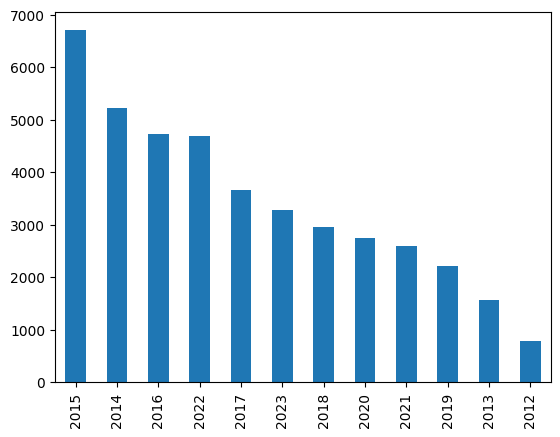

In [29]:
# plot the bar graph of no of tweets yearwise
df['year'] = pd.DatetimeIndex(df['Datetime']).year
df['year'].value_counts().plot(kind='bar')
plt.show()

In 2015, there were Legislative Assembly election in Delhi in which Aam Aadmi Party gained clear majority. We can see that this year have much higher count of tweets, that could be due to their election campaign. 

In [30]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,year
5,2023-06-06 11:40:30+00:00,1666047407908585472,GGSIPU Campus East Delhi 388 Cr 19 Acre Area 2...,AamAadmiParty,1051.0,2023
6,2023-06-06 11:40:29+00:00,1666047404280528899,GGSIPU Green Campus East Delhi 8 June Zero Ene...,AamAadmiParty,258.0,2023
7,2023-06-06 10:50:39+00:00,1666034861788864512,AAP Senior Leader amp Cabinet Minister AtishiA...,AamAadmiParty,278.0,2023
13,2023-06-06 05:30:45+00:00,1665954359207944193,Ground Report with RJ Ashish amp Minister Saur...,AamAadmiParty,372.0,2023
14,2023-06-06 05:23:41+00:00,1665952580885704704,Honble Minister Ms AtishiAAP will address an i...,AamAadmiParty,145.0,2023


In [31]:
# tweet that got highest number of likeCount
df[df['likeCount'] == df['likeCount'].max()]

,Datetime,Tweet Id,Text,Username,likeCount,year
6314,2022-08-21 13:54:18+00:00,1561350985368227841,Modi ji will not be able to stop us from givin...,AamAadmiParty,54954.0,2022


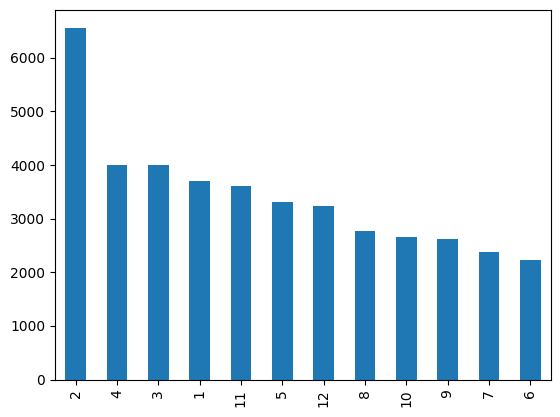

In [32]:
# visualise the the no of tweets per month
df['month'] = pd.DatetimeIndex(df['Datetime']).month
df['month'].value_counts().plot(kind='bar')
plt.show()

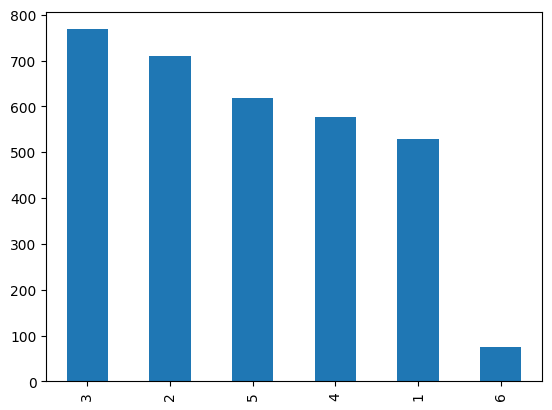

In [33]:
# bar plot of tweets in 2023 by monthwise
df[df['year'] == 2023]['month'].value_counts().plot(kind='bar')
plt.show()

In the current year, most tweets are posted in March followed by February. <br>
PS: This data is only till 6th June.

#### Tweet Sentiment Analysis

Sentiment Analysis: Sentiment analysis is a natural language processing technique used to determine the emotional tone of a piece of text, such as positive, negative, or neutral. It involves analyzing the words, phrases, and context to classify the sentiment expressed. The goal is to understand and quantify the subjective sentiment or opinion conveyed in the text, which can be useful for various applications like social media monitoring, customer feedback analysis, and brand reputation management.

Here two techniques are used for sentiment analysis: <br>
1. VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from Huggingface

##### 1. VADER (Valence Aware Dictionary and Sentiment Reasoner)

Advantages of using VADER for sentiment analysis:
1. Simplicity: VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-trained lexicon-based approach that does not require extensive training data or complex models. It offers a simple and ready-to-use solution for sentiment analysis tasks. <br>
2. Domain Adaptability: VADER is designed to handle sentiment analysis across different domains. It uses a combination of lexical features, grammar rules, and heuristics to interpret sentiment, allowing it to work reasonably well in various contexts without extensive customization.<br>
3. Fine-grained Sentiment: VADER provides not only the overall sentiment polarity (positive, negative, or neutral) but also a measure of sentiment intensity. It assigns sentiment scores to individual words and incorporates their contextual valence to capture subtle variations in sentiment strength.

Disadvantages of using VADER for sentiment analysis:
1. Reliance on Lexicons: VADER's effectiveness heavily relies on the quality and coverage of its underlying lexicons. If specific domain-specific or colloquial terms are not adequately represented in the lexicon, VADER may struggle to accurately capture the sentiment.<br>
2. Limited Contextual Understanding: VADER primarily relies on lexical and grammatical patterns, which may limit its ability to understand more nuanced or complex language structures. It may struggle with sarcasm, irony, or sentiment expressed through subtle linguistic cues.<br>
3. Lack of Targeted Sentiment Analysis: While VADER performs well at overall sentiment analysis, it may not be the ideal choice for tasks that require targeted sentiment analysis at the aspect or entity level. It does not explicitly handle the identification of sentiment towards specific entities or aspects within a sentence.

In [35]:
df = pd.read_csv('BJP4India_cleaned.csv')

In [36]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,year,month
0,2023-06-06 11:40:30+00:00,1666047407908585472,GGSIPU Campus East Delhi 388 Cr 19 Acre Area 2...,AamAadmiParty,1051.0,2023,6
1,2023-06-06 11:40:29+00:00,1666047404280528899,GGSIPU Green Campus East Delhi 8 June Zero Ene...,AamAadmiParty,258.0,2023,6
2,2023-06-06 10:50:39+00:00,1666034861788864512,AAP Senior Leader amp Cabinet Minister AtishiA...,AamAadmiParty,278.0,2023,6
3,2023-06-06 05:30:45+00:00,1665954359207944193,Ground Report with RJ Ashish amp Minister Saur...,AamAadmiParty,372.0,2023,6
4,2023-06-06 05:23:41+00:00,1665952580885704704,Honble Minister Ms AtishiAAP will address an i...,AamAadmiParty,145.0,2023,6


In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [39]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [40]:
# Initializing the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [41]:
sia.polarity_scores('Natural Language Processing is fun!')

{'neg': 0.0, 'neu': 0.33, 'pos': 0.67, 'compound': 0.7263}

In [42]:
sia.polarity_scores('Quantum entalgement is a very hard concept to understand!')

{'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'compound': -0.2465}

In [43]:
# run the polarity_scores() method on each tweet and append the results to a new column in the dataframe
df['polarity_score'] = df['Text'].apply(lambda x: sia.polarity_scores(x))

In [44]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,year,month,polarity_score
0,2023-06-06 11:40:30+00:00,1666047407908585472,GGSIPU Campus East Delhi 388 Cr 19 Acre Area 2...,AamAadmiParty,1051.0,2023,6,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2023-06-06 11:40:29+00:00,1666047404280528899,GGSIPU Green Campus East Delhi 8 June Zero Ene...,AamAadmiParty,258.0,2023,6,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp..."
2,2023-06-06 10:50:39+00:00,1666034861788864512,AAP Senior Leader amp Cabinet Minister AtishiA...,AamAadmiParty,278.0,2023,6,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp..."
3,2023-06-06 05:30:45+00:00,1665954359207944193,Ground Report with RJ Ashish amp Minister Saur...,AamAadmiParty,372.0,2023,6,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'comp..."
4,2023-06-06 05:23:41+00:00,1665952580885704704,Honble Minister Ms AtishiAAP will address an i...,AamAadmiParty,145.0,2023,6,"{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'comp..."


In [45]:
# separate the polarity score into four separate columns
df = pd.concat([df.drop(['polarity_score'], axis=1), df['polarity_score'].apply(pd.Series)], axis=1)


In [46]:
# add year column
df['year'] = pd.DatetimeIndex(df['Datetime']).year

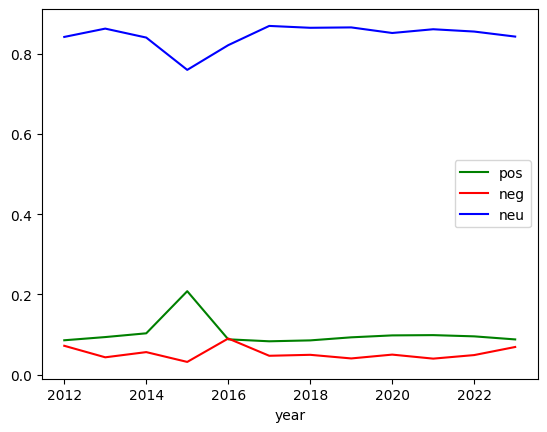

In [47]:
# plot the line graph of positive, negative, neutral scores by yearwise side by side
df.groupby('year')['pos'].mean().plot(kind='line', color='green')
df.groupby('year')['neg'].mean().plot(kind='line', color='red')
df.groupby('year')['neu'].mean().plot(kind='line', color='blue')
plt.legend()
plt.show()

In [48]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,year,month,neg,neu,pos,compound
0,2023-06-06 11:40:30+00:00,1666047407908585472,GGSIPU Campus East Delhi 388 Cr 19 Acre Area 2...,AamAadmiParty,1051.0,2023,6,0.0,1.000,0.000,0.0000
1,2023-06-06 11:40:29+00:00,1666047404280528899,GGSIPU Green Campus East Delhi 8 June Zero Ene...,AamAadmiParty,258.0,2023,6,0.0,0.806,0.194,0.6486
2,2023-06-06 10:50:39+00:00,1666034861788864512,AAP Senior Leader amp Cabinet Minister AtishiA...,AamAadmiParty,278.0,2023,6,0.0,0.878,0.122,0.2023
3,2023-06-06 05:30:45+00:00,1665954359207944193,Ground Report with RJ Ashish amp Minister Saur...,AamAadmiParty,372.0,2023,6,0.0,0.764,0.236,0.8625
4,2023-06-06 05:23:41+00:00,1665952580885704704,Honble Minister Ms AtishiAAP will address an i...,AamAadmiParty,145.0,2023,6,0.0,0.886,0.114,0.2023


1. Negative (neg): This score represents the probability or intensity of negative sentiment in the given text. It measures the extent to which the text expresses negativity or a negative emotional tone. A higher neg score indicates a stronger negative sentiment.

2. Neutral (neu): The neu score indicates the probability or intensity of neutral sentiment in the text. It measures the degree of neutrality or lack of strong emotional sentiment. A higher neu score suggests a more neutral or unbiased expression.

3. Positive (pos): The pos score reflects the probability or intensity of positive sentiment in the text. It measures the extent to which the text conveys positivity or a positive emotional tone. A higher pos score indicates a stronger positive sentiment.

4. Compound: The compound score represents an overall normalized sentiment score that combines the positive, negative, and neutral scores. It provides a single aggregated measure of sentiment that ranges from -1 to 1, where -1 indicates highly negative sentiment, 0 represents neutral sentiment, and 1 indicates highly positive sentiment.

In [49]:
# drop neg neu pos columns
df.drop(['neg', 'neu', 'pos'], axis=1, inplace=True)

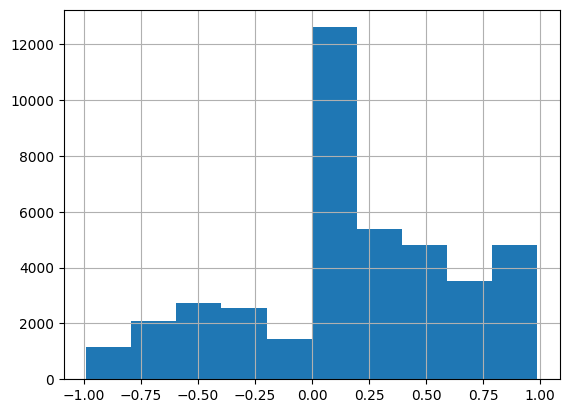

In [50]:
# plot the histogram of compound scores
df['compound'].hist()
plt.show()

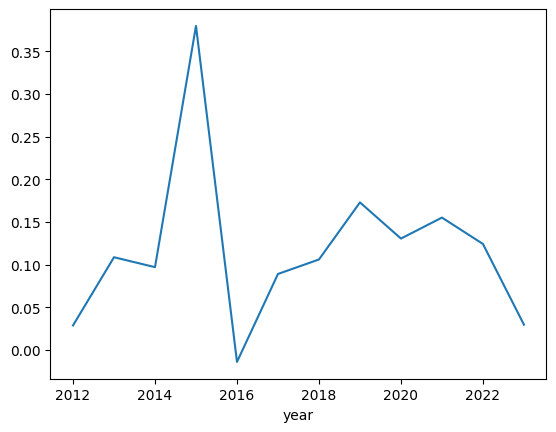

In [51]:
# plot line graph of compound scores yearwise
df.groupby('year')['compound'].mean().plot(kind='line')
plt.show()

In [52]:
# drop the year column
df.drop('year', axis=1, inplace=True)
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,month,compound
0,2023-06-06 11:40:30+00:00,1666047407908585472,GGSIPU Campus East Delhi 388 Cr 19 Acre Area 2...,AamAadmiParty,1051.0,6,0.0000
1,2023-06-06 11:40:29+00:00,1666047404280528899,GGSIPU Green Campus East Delhi 8 June Zero Ene...,AamAadmiParty,258.0,6,0.6486
2,2023-06-06 10:50:39+00:00,1666034861788864512,AAP Senior Leader amp Cabinet Minister AtishiA...,AamAadmiParty,278.0,6,0.2023
3,2023-06-06 05:30:45+00:00,1665954359207944193,Ground Report with RJ Ashish amp Minister Saur...,AamAadmiParty,372.0,6,0.8625
4,2023-06-06 05:23:41+00:00,1665952580885704704,Honble Minister Ms AtishiAAP will address an i...,AamAadmiParty,145.0,6,0.2023


In [66]:
df['compound'].mean()

0.1372866165486704

An average compound score of 0.1372866165486704 indicates a slightly positive sentiment overall. The compound score, which ranges from -1 to 1, provides an aggregated measure of sentiment polarity. Values closer to 1 indicate stronger positive sentiment, values closer to -1 indicate stronger negative sentiment, and values around 0 suggest a more neutral sentiment.
In this case, the average compound score of 0.1372866165486704 suggests that the text data, on average, leans towards a positive sentiment. However, the sentiment might not be overwhelmingly positive as the score is still relatively close to 0. It's important to note that the interpretation of sentiment scores can vary depending on the specific context and dataset being analyzed

##### 2. Roberta Pretrained Model from Huggingface

Advantages of using the RoBERTa model for sentiment analysis:
1. State-of-the-art Performance: RoBERTa is a highly advanced and powerful language model that has achieved state-of-the-art performance on various natural language processing tasks, including sentiment analysis. It has been trained on a large corpus of text data and can capture intricate linguistic patterns and context effectively.

2. Contextual Understanding: RoBERTa exhibits a strong contextual understanding of text, allowing it to consider the meaning and sentiment of words in relation to their surrounding context. This enables more accurate sentiment analysis, especially for sentences with complex structures or ambiguous sentiment expressions.

3. Transfer Learning Capability: RoBERTa benefits from transfer learning, as it has been pre-trained on a massive amount of data. This means it can leverage its knowledge from a diverse range of language patterns and semantics, making it adaptable to sentiment analysis tasks across different domains and languages.

Disadvantages of using the RoBERTa model for sentiment analysis:

1. Computational Resources: RoBERTa is a large and complex model that requires significant computational resources, including powerful hardware and substantial memory. Deploying and utilizing RoBERTa for sentiment analysis can be resource-intensive, limiting its practicality in resource-constrained environments.

2. Training Data Dependence: While RoBERTa performs well in general sentiment analysis, its effectiveness is largely dependent on the quality, relevance, and representativeness of the training data used. If the sentiment analysis task involves a specific domain or uses case, additional fine-tuning or customization may be necessary to achieve optimal performance.

3. Model Interpretability: Deep neural network models like RoBERTa are often considered black boxes, making it challenging to interpret and understand the underlying decision-making process. The lack of transparency can make it difficult to explain and validate the sentiment analysis results, especially in sensitive or regulated domains.

In [53]:
!pip3 install transformers
!pip3 install scipy
!pip3 install torch
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
!pip3 install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [56]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [57]:
# Run for Roberta 
example = "I hate you"

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9654269, 'roberta_neu': 0.028996332, 'roberta_pos': 0.0055766553}


In [58]:
# apply the model on each tweet and append the results to a new column in the dataframe and also show the progress bar
def get_sentiment(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict



In [60]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,month,compound
0,2023-06-06 11:40:30+00:00,1666047407908585472,GGSIPU Campus East Delhi 388 Cr 19 Acre Area 2...,AamAadmiParty,1051.0,6,0.0000
1,2023-06-06 11:40:29+00:00,1666047404280528899,GGSIPU Green Campus East Delhi 8 June Zero Ene...,AamAadmiParty,258.0,6,0.6486
2,2023-06-06 10:50:39+00:00,1666034861788864512,AAP Senior Leader amp Cabinet Minister AtishiA...,AamAadmiParty,278.0,6,0.2023
3,2023-06-06 05:30:45+00:00,1665954359207944193,Ground Report with RJ Ashish amp Minister Saur...,AamAadmiParty,372.0,6,0.8625
4,2023-06-06 05:23:41+00:00,1665952580885704704,Honble Minister Ms AtishiAAP will address an i...,AamAadmiParty,145.0,6,0.2023


In [61]:
dfdummy = df.head(100)

In [62]:
# apply the get_sentiment() function on each tweet and append the results to a new column in the dataframe 
dfdummy['roberta_scores'] = dfdummy['Text'].apply(get_sentiment)

<ipython-input-62-58769a93e1f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdummy['roberta_scores'] = dfdummy['Text'].apply(get_sentiment)


In [63]:
dfdummy.head()

,Datetime,Tweet Id,Text,Username,likeCount,month,compound,roberta_scores
0,2023-06-06 11:40:30+00:00,1666047407908585472,GGSIPU Campus East Delhi 388 Cr 19 Acre Area 2...,AamAadmiParty,1051.0,6,0.0000,"{'roberta_neg': 0.065509886, 'roberta_neu': 0...."
1,2023-06-06 11:40:29+00:00,1666047404280528899,GGSIPU Green Campus East Delhi 8 June Zero Ene...,AamAadmiParty,258.0,6,0.6486,"{'roberta_neg': 0.012010883, 'roberta_neu': 0...."
2,2023-06-06 10:50:39+00:00,1666034861788864512,AAP Senior Leader amp Cabinet Minister AtishiA...,AamAadmiParty,278.0,6,0.2023,"{'roberta_neg': 0.021171538, 'roberta_neu': 0...."
3,2023-06-06 05:30:45+00:00,1665954359207944193,Ground Report with RJ Ashish amp Minister Saur...,AamAadmiParty,372.0,6,0.8625,"{'roberta_neg': 0.01176996, 'roberta_neu': 0.3..."
4,2023-06-06 05:23:41+00:00,1665952580885704704,Honble Minister Ms AtishiAAP will address an i...,AamAadmiParty,145.0,6,0.2023,"{'roberta_neg': 0.0034473443, 'roberta_neu': 0..."


In [64]:
df.shape

(41103, 7)

In [65]:
# apply the get_sentiment() function on each tweet and append the results to a new column in the dataframe
df['roberta_scores'] = df['Text'].apply(get_sentiment)

In [67]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,month,compound,roberta_scores
0,2023-06-06 11:40:30+00:00,1666047407908585472,GGSIPU Campus East Delhi 388 Cr 19 Acre Area 2...,AamAadmiParty,1051.0,6,0.0000,"{'roberta_neg': 0.065509886, 'roberta_neu': 0...."
1,2023-06-06 11:40:29+00:00,1666047404280528899,GGSIPU Green Campus East Delhi 8 June Zero Ene...,AamAadmiParty,258.0,6,0.6486,"{'roberta_neg': 0.012010883, 'roberta_neu': 0...."
2,2023-06-06 10:50:39+00:00,1666034861788864512,AAP Senior Leader amp Cabinet Minister AtishiA...,AamAadmiParty,278.0,6,0.2023,"{'roberta_neg': 0.021171538, 'roberta_neu': 0...."
3,2023-06-06 05:30:45+00:00,1665954359207944193,Ground Report with RJ Ashish amp Minister Saur...,AamAadmiParty,372.0,6,0.8625,"{'roberta_neg': 0.01176996, 'roberta_neu': 0.3..."
4,2023-06-06 05:23:41+00:00,1665952580885704704,Honble Minister Ms AtishiAAP will address an i...,AamAadmiParty,145.0,6,0.2023,"{'roberta_neg': 0.0034473443, 'roberta_neu': 0..."


In [68]:
# seprate the roberta_scores column into three separate columns
df = pd.concat([df.drop(['roberta_scores'], axis=1), df['roberta_scores'].apply(pd.Series)], axis=1)

In [69]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,month,compound,roberta_neg,roberta_neu,roberta_pos
0,2023-06-06 11:40:30+00:00,1666047407908585472,GGSIPU Campus East Delhi 388 Cr 19 Acre Area 2...,AamAadmiParty,1051.0,6,0.0000,0.065510,0.898972,0.035518
1,2023-06-06 11:40:29+00:00,1666047404280528899,GGSIPU Green Campus East Delhi 8 June Zero Ene...,AamAadmiParty,258.0,6,0.6486,0.012011,0.777282,0.210707
2,2023-06-06 10:50:39+00:00,1666034861788864512,AAP Senior Leader amp Cabinet Minister AtishiA...,AamAadmiParty,278.0,6,0.2023,0.021172,0.908075,0.070754
3,2023-06-06 05:30:45+00:00,1665954359207944193,Ground Report with RJ Ashish amp Minister Saur...,AamAadmiParty,372.0,6,0.8625,0.011770,0.340431,0.647799
4,2023-06-06 05:23:41+00:00,1665952580885704704,Honble Minister Ms AtishiAAP will address an i...,AamAadmiParty,145.0,6,0.2023,0.003447,0.680876,0.315677


In [70]:
# save the dataframe to csv file
df.to_csv('AamAadmiParty_VADER_ROBERTA_done.csv', index=False)

In [71]:
# create a year column
df['year'] = pd.DatetimeIndex(df['Datetime']).year

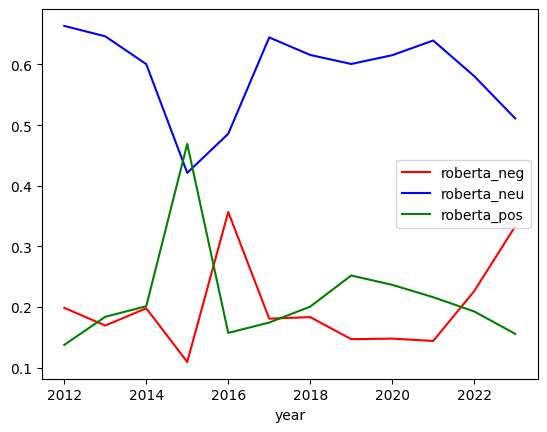

In [72]:
# calculate the mean of roberta_neg, roberta_neu, roberta_pos columns and plot the line graph
df.groupby('year')['roberta_neg'].mean().plot(kind='line', color='red')
df.groupby('year')['roberta_neu'].mean().plot(kind='line', color='blue')
df.groupby('year')['roberta_pos'].mean().plot(kind='line', color='green')   
plt.legend()
plt.show()

##### End Comparison:

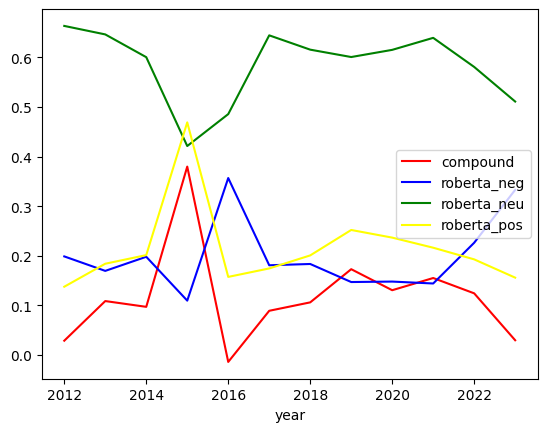

In [73]:
# comparision of VADER and ROBERTA
df.groupby('year')['compound'].mean().plot(kind='line', color='red')
df.groupby('year')['roberta_neg'].mean().plot(kind='line', color='blue')
df.groupby('year')['roberta_neu'].mean().plot(kind='line', color='green')
df.groupby('year')['roberta_pos'].mean().plot(kind='line', color='yellow')
plt.legend()
plt.show()